In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
tetrahedron_points = [np.array([0., 0., 0.]),
                      np.array([1., 0., 0.]),
                      np.array([np.cos(np.pi/3), np.sin(np.pi/3), 0.]),
                      np.array([0.5, 0.5/np.sqrt(3), np.sqrt(2./3.)])]

sampled_points = np.concatenate([np.random.multivariate_normal(point, np.eye(3)*0.0001, 10)
                                 for point in tetrahedron_points])

init_points = np.concatenate([np.random.multivariate_normal(point[:2], np.eye(2)*0.0001, 10)
                              for point in tetrahedron_points])

In [3]:
N = sampled_points.shape[0]
d = sampled_points.shape[1]

In [4]:
X = tf.placeholder('float')
Xshape = tf.shape(X)

sqX = tf.reduce_sum(X*X, 1)
sqX = tf.reshape(sqX, [-1, 1])
sqDX = sqX - 2*tf.matmul(X, tf.transpose(X)) + tf.transpose(sqX)
DX = tf.sqrt(sqDX)

Y = tf.Variable(init_points, dtype='float')
sqY = tf.reduce_sum(Y*Y, 1)
sqY = tf.reshape(sqY, [-1, 1])
sqDY = sqY - 2*tf.matmul(Y, tf.transpose(Y)) + tf.transpose(sqY)
DY = tf.sqrt(sqDY)

In [5]:
Z = tf.reduce_sum(DX)*0.5
numerator = tf.reduce_sum(tf.divide(tf.square(DX-DY), DX))*0.5
cost = numerator / Z

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

In [7]:
sess = tf.Session()

In [8]:
sess.run(init)

In [9]:
sess.run(DX, feed_dict={X: sampled_points})

array([[ 0.        ,  0.02275717,  0.03439943, ...,  1.01660335,
         0.9880693 ,  0.97156316],
       [ 0.02275717,  0.        ,  0.04874538, ...,  1.00481927,
         0.9760226 ,  0.95973206],
       [ 0.03439943,  0.04874538,  0.        , ...,  1.0505029 ,
         1.02189052,  1.00528431],
       ..., 
       [ 1.01660347,  1.00481927,  1.0505029 , ...,  0.        ,
         0.03226907,  0.05557726],
       [ 0.9880693 ,  0.97602254,  1.02189052, ...,  0.03226907,
         0.        ,  0.03247713],
       [ 0.97156316,  0.959732  ,  1.00528431, ...,  0.05557726,
         0.03247713,  0.        ]], dtype=float32)

In [10]:
sess.run(DY, feed_dict={X: sampled_points})

array([[ 0.        ,  0.01672095,  0.02511763, ...,  0.58615142,
         0.57745242,  0.58862674],
       [ 0.01672095,  0.        ,  0.0085183 , ...,  0.57866353,
         0.57002497,  0.58147728],
       [ 0.02511764,  0.0085183 ,  0.        , ...,  0.57666713,
         0.56806493,  0.57966864],
       ..., 
       [ 0.58615142,  0.57866353,  0.57666713, ...,  0.        ,
         0.00897694,  0.01340552],
       [ 0.57745242,  0.57002491,  0.56806493, ...,  0.00897694,
         0.        ,  0.01557342],
       [ 0.58862668,  0.58147728,  0.57966858, ...,  0.01340552,
         0.01557342,  0.        ]], dtype=float32)

In [11]:
calculated_Y = sess.run(Y, feed_dict={X: sampled_points})

In [12]:
sess.close()

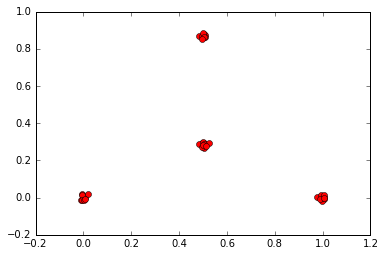

In [13]:
embed1, embed2 = calculated_Y.transpose()
plt.plot(embed1, embed2, 'ro')